# Cyber Security
### By: Brendan Kenny, Kimberley Maldonado, Emily Su

In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Data Preprocessing

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rt_iot2022 = fetch_ucirepo(id=942) 
  
# data (as pandas dataframes) 
X = rt_iot2022.data.features 
y = rt_iot2022.data.targets 
  
# metadata 
print(rt_iot2022.metadata) 
  
# variable information 
print(rt_iot2022.variables) 

{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

In [2]:
print(rt_iot2022)

{'data': {'ids':           id
0          0
1          1
2          2
3          3
4          4
...      ...
123112  2005
123113  2006
123114  2007
123115  2008
123116  2009

[123117 rows x 1 columns], 'features':         id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt      32.011598             9   
1           51143       1883   tcp    mqtt      31.883584             9   
2           44761       1883   tcp    mqtt      32.124053             9   
3           60893       1883   tcp    mqtt      31.961063             9   
4           51087       1883   tcp    mqtt      31.902362             9   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -       0.000006             1   
123113      59247      64623   tcp       -       0.000007             1   
123114      59247      64680   tcp       -       0.000006             1   
123115      59247      65000   tcp   

In [3]:
X

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,2.282415e+06,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,2.028307e+06,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,2.281904e+06,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,2.047288e+06,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,2.087657e+06,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,6.914139e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024


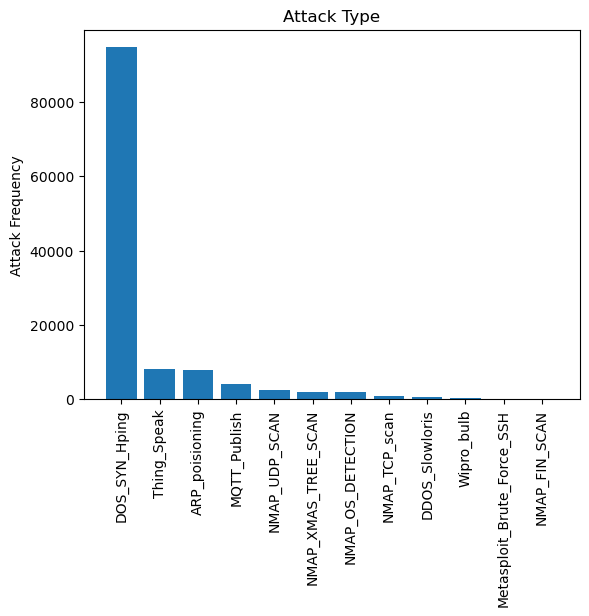

NameError: name 'savefig' is not defined

In [30]:
## Plotting distribution of classes
fig, ax = plt.subplots()

fruits = ['DOS_SYN_Hping', 'Thing_Speak', 'ARP_poisioning', 'MQTT_Publish', 'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN',
         'NMAP_OS_DETECTION', 'NMAP_TCP_scan', 'DDOS_Slowloris', 'Wipro_bulb', 'Metasploit_Brute_Force_SSH',
          'NMAP_FIN_SCAN']
counts = np.asarray(y.value_counts().tolist())
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits,counts) #, label=bar_labels, color=bar_colors)

ax.set_ylabel('Attack Frequency')
ax.set_title('Attack Type')
plt.xticks(rotation=90)
plt.show()

In [4]:
print(y['Attack_type'].unique())
print(X['proto'].unique())

['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']
['tcp' 'udp' 'icmp']


In [4]:
#y = np.ravel(y)

categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Boosting Methods

## Ada Boosting

In [5]:
#Adaboost model parameters and fitting to training data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)     


In [7]:
#accuracy of model 
Ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate = 2.0 , algorithm="SAMME", random_state=42)
Ada_clf.fit(X_train, y_train)

y_pred_Ada = Ada_clf.predict(X_test)

accuracy_Ada = accuracy_score(y_test, y_pred_Ada)
report_Ada = classification_report(y_test, y_pred_Ada, output_dict=True)

print("accuracy:", accuracy_Ada)

class_report_df_Ada = pd.DataFrame(report_Ada).transpose()
class_report_df_Ada = class_report_df_Ada.rename(columns={'precision': 'Precision', 'recall': 'Recall', 'f1-score': 'F1-Score', 'support': 'Support'})

# Print the DataFrame
print(class_report_df_Ada)

/Users/emilysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.8413336582196231
                            Precision    Recall  F1-Score       Support
ARP_poisioning               0.308082  0.654626  0.418982   1578.000000
DDOS_Slowloris               0.672897  0.720000  0.695652    100.000000
DOS_SYN_Hping                1.000000  0.884797  0.938878  18897.000000
MQTT_Publish                 0.799448  0.997704  0.887640    871.000000
Metasploit_Brute_Force_SSH   0.000000  0.000000  0.000000      6.000000
NMAP_FIN_SCAN                0.000000  0.000000  0.000000      3.000000
NMAP_OS_DETECTION            0.982500  1.000000  0.991173    393.000000
NMAP_TCP_scan                1.000000  0.013636  0.026906    220.000000
NMAP_UDP_SCAN                0.283323  0.934560  0.434824    489.000000
NMAP_XMAS_TREE_SCAN          1.000000  0.966146  0.982781    384.000000
Thing_Speak                  0.844995  0.483077  0.614722   1625.000000
Wipro_bulb                   0.583333  0.241379  0.341463     58.000000
accuracy                     0.8413

Counter({'DOS_SYN_Hping': 16720, 'ARP_poisioning': 3353, 'NMAP_UDP_SCAN': 1613, 'MQTT_Publish': 1087, 'Thing_Speak': 929, 'NMAP_OS_DETECTION': 400, 'NMAP_XMAS_TREE_SCAN': 371, 'DDOS_Slowloris': 107, 'Wipro_bulb': 24, 'NMAP_FIN_SCAN': 17, 'NMAP_TCP_scan': 3})
Counter({'DOS_SYN_Hping': 18897, 'Thing_Speak': 1625, 'ARP_poisioning': 1578, 'MQTT_Publish': 871, 'NMAP_UDP_SCAN': 489, 'NMAP_OS_DETECTION': 393, 'NMAP_XMAS_TREE_SCAN': 384, 'NMAP_TCP_scan': 220, 'DDOS_Slowloris': 100, 'Wipro_bulb': 58, 'Metasploit_Brute_Force_SSH': 6, 'NMAP_FIN_SCAN': 3})


Text(0.5, 1.0, 'Adaboost Confusion Matrix')

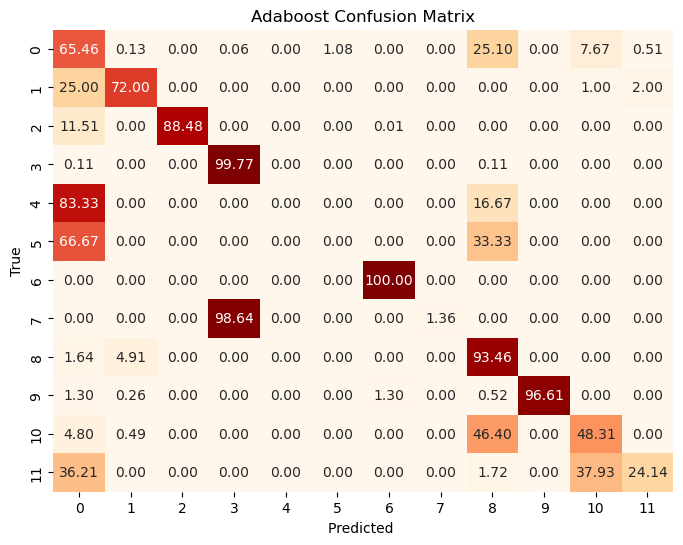

In [8]:
#number of classified and misclassified 

from collections import Counter
class_counts = Counter(y_test)
class_counts_pred = Counter(y_pred_Ada)
print(class_counts_pred)
print(class_counts)

#plotting confusion matrix 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

#confusion matrix 
cm_Ada = confusion_matrix(y_test, y_pred_Ada)
#making it percent
cm_percent_Ada = cm_Ada / np.sum(cm_Ada, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_Ada, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('Adaboost Confusion Matrix')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
base = DecisionTreeClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0, 2.0],
    'base_estimator__max_depth': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(base_estimator = base, random_state=42, algorithm = 'SAMME'),
param_grid=param_grid,
cv=3,  # 3-fold cross-validation
scoring='balanced_accuracy',  # Use accuracy as the evaluation metric
n_jobs=-1  # Use all available CPU cores
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)

In [ ]:

y_pred_Ada_cv = best_model.predict(X_test)
print(best_model)
print("Test accuracy of the best model:", test_accuracy)
report_Ada_cv = classification_report(y_test, y_pred_Ada_cv, output_dict=True)
class_report_df_ada_cv = pd.DataFrame(report_Ada_cv).transpose()
class_report_df_ada_cv = class_report_df_ada_cv.rename(columns={'precision': 'Precision', 'recall': 'Recall', 'f1-score': 'F1-Score', 'support': 'Support'})

# Print the DataFrame
print(class_report_df_ada_cv)


#confusion matrix 
cm_ada_cv = confusion_matrix(y_test, y_pred_Ada_cv)
#making it percent
cm_percent_ada_cv = cm_ada_cv / np.sum(cm_ada_cv, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_ada_cv, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('AdaBoost Confusion Matrix')
savefig("AdaBoost%_CM.png")


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

xg_clf = XGBClassifier(n_estimators=100, max_depth=1, learning_rate=2.0, objective='multi:softprob')
xg_clf.fit(X_train, y_train_encoded)



In [ ]:
y_test_encoded = label_encoder.fit_transform(y_test)

y_pred_xg = xg_clf.predict(X_test)

accuracy_xg = accuracy_score(y_test_encoded, y_pred_xg)
report_xg = classification_report(y_test_encoded, y_pred_xg, output_dict=True)

print("accuracy:", accuracy_xg)

class_report_df_xg = pd.DataFrame(report_xg).transpose()
class_report_df_xg = class_report_df_xg.rename(columns={'precision': 'Precision', 'recall': 'Recall', 'f1-score': 'F1-Score', 'support': 'Support'})

# Print the DataFrame
print(class_report_df_xg)


In [ ]:
#confusion matrix 
cm_xg = confusion_matrix(y_test_encoded, y_pred_xg)
#making it percent
cm_percent_xg = cm_xg / np.sum(cm_xg, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_xg, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('XGboost Confusion Matrix')


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from sklearn.metrics import roc_auc_score

# A parameter grid for XGBoost
params = {
        'n_estimators' : [50, 100, 200],
        'learning_rate': [0.1, 0.5, 1.0, 2.0],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [1, 2, 3, 4, 5]
        }

      

xg_clf_gs = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=.01, objective='multi:softprob')
xg_clf.fit(X_train, y_train_encoded)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xg_clf_gs, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train_encoded), verbose=3, random_state=42 )


random_search.fit(X_train, y_train_encoded)


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)

In [ ]:
best_model_xg_cv = random_search.best_estimator_  # Extract the best XGBoost model
y_pred_test_xg = best_model_xg_cv.predict(X_test)  # Predict labels for the test set

# Calculate accuracy
test_accuracy_xg = accuracy_score(y_test_encoded, y_pred_test_xg)
print("Test accuracy of the best XGBoost model:", test_accuracy_xg)

In [ ]:
#confusion matrix 
cm_xg_cv = confusion_matrix(y_test_encoded, y_pred_test_xg)
#making it percent
cm_percent_xg_cv = cm_xg_cv / np.sum(cm_xg_cv, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_xg_cv, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('XGboost Confusion Matrix')
savefig("XGboost_%_CM.png")

y_pred_xg_cv = best_model_xg_cv.predict(X_test)

report_xg_cv = classification_report(y_test_encoded, y_pred_xg_cv, output_dict=True)
class_report_df_xg_cv = pd.DataFrame(report_xg_cv).transpose()
class_report_df_xg_cv = class_report_df_xg_cv.rename(columns={'precision': 'Precision', 'recall': 'Recall', 'f1-score': 'F1-Score', 'support': 'Support'})

# Print the DataFrame
print(class_report_df_xg_cv)


# Ensemble Methods

In [5]:
data_encoded = pd.get_dummies(X, columns=['proto', 'service'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA
pca = PCA(n_components=0.95)  # Adjust based on desired variance retention
X_pca = pca.fit_transform(X_scaled)

# Output the results
print("Number of components kept: ", pca.n_components_)
print("Explained variance ratio: ", pca.explained_variance_ratio_.sum())

Number of components kept:  32
Explained variance ratio:  0.9549256505614812


In [6]:
# Convert the PCA-transformed data back into a DataFrame
columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_transformed_df = pd.DataFrame(X_pca, columns=columns)

# Display the first few rows of the transformed dataset
print(pca_transformed_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.181003 -6.828075  2.017667  3.493589 -2.778754  3.234117  0.615673   
1  9.187093 -6.837351  2.052823  3.462516 -2.813211  3.165257  0.414530   
2  9.204040 -6.850761  2.048676  3.493847 -2.792665  3.249311  0.604165   
3  9.214250 -6.857204  2.093186  3.447216 -2.827063  3.196384  0.406184   
4  9.196380 -6.839160  2.054188  3.461204 -2.806359  3.176410  0.453214   

        PC8       PC9      PC10  ...      PC23      PC24      PC25      PC26  \
0  0.126813  1.635588 -1.821072  ...  0.148239  0.120094  0.158559 -0.035362   
1  0.068961  1.752168 -1.800029  ...  0.158393  0.273758  0.146082 -0.113306   
2  0.079998  1.664626 -1.815278  ...  0.154272  0.208125  0.159944 -0.076916   
3 -0.009204  1.783648 -1.777180  ...  0.167873  0.422677  0.154546 -0.180699   
4  0.060387  1.727191 -1.786030  ...  0.157689  0.279946  0.154514 -0.115990   

       PC27      PC28      PC29      PC30      PC31      PC32  
0  0

In [7]:
# Get the PCA components (loadings) of each principal component
loadings = pd.DataFrame(pca.components_.T, columns=columns, index=data_encoded.columns)

# Sort the loadings of each principal component by descending absolute value
sorted_loadings = loadings.apply(lambda x: x.abs().sort_values(ascending=False), axis=0)

# Display the sorted loadings of the first few principal components
print(sorted_loadings.head())

# Optionally, examine the explained variance of each principal component
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, index=columns, columns=['Explained Variance'])
print(explained_variance.head())

                 PC1       PC2       PC3       PC4       PC5       PC6  \
active.avg  0.165916  0.131824  0.031451  0.097856  0.051871  0.045647   
active.max  0.172807  0.168850  0.073915  0.107535  0.057751  0.096952   
active.min  0.158332  0.151950  0.083230  0.099812  0.022271  0.140333   
active.std  0.119718  0.230366  0.018883  0.048080  0.121792  0.002490   
active.tot  0.065210  0.027437  0.182399  0.152098  0.043257  0.125637   

                 PC7       PC8       PC9      PC10  ...      PC23      PC24  \
active.avg  0.009160  0.026544  0.053427  0.027012  ...  0.017573  0.004783   
active.max  0.034617  0.001150  0.032633  0.065982  ...  0.000175  0.008983   
active.min  0.025086  0.004875  0.041845  0.006116  ...  0.001425  0.004037   
active.std  0.003045  0.028303  0.007482  0.033374  ...  0.016676  0.002191   
active.tot  0.056751  0.236062  0.025715  0.038092  ...  0.004655  0.006030   

                PC25      PC26      PC27      PC28      PC29      PC30  \
active

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# More detailed performance analysis
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9960201429499675
                            precision    recall  f1-score   support

            ARP_poisioning       0.97      0.98      0.97      1578
            DDOS_Slowloris       0.95      1.00      0.98       100
             DOS_SYN_Hping       1.00      1.00      1.00     18897
              MQTT_Publish       0.99      1.00      1.00       871
Metasploit_Brute_Force_SSH       0.71      0.83      0.77         6
             NMAP_FIN_SCAN       1.00      0.67      0.80         3
         NMAP_OS_DETECTION       1.00      1.00      1.00       393
             NMAP_TCP_scan       1.00      1.00      1.00       220
             NMAP_UDP_SCAN       0.99      0.98      0.99       489
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       384
               Thing_Speak       0.98      0.98      0.98      1625
                Wipro_bulb       0.87      0.81      0.84        58

                  accuracy                           1.00     24624
   

In [9]:
#X_pca is PCA-transformed features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

/var/folders/qh/y4xt274x4nd_t772t5kds5hr0000gn/T/ipykernel_59755/4109374301.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9971572449642625
                            precision    recall  f1-score   support

            ARP_poisioning       0.97      0.99      0.98      1578
            DDOS_Slowloris       0.99      1.00      1.00       100
             DOS_SYN_Hping       1.00      1.00      1.00     18897
              MQTT_Publish       1.00      1.00      1.00       871
Metasploit_Brute_Force_SSH       0.83      0.83      0.83         6
             NMAP_FIN_SCAN       1.00      0.67      0.80         3
         NMAP_OS_DETECTION       1.00      1.00      1.00       393
             NMAP_TCP_scan       1.00      1.00      1.00       220
             NMAP_UDP_SCAN       1.00      0.98      0.99       489
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       384
               Thing_Speak       0.99      0.98      0.98      1625
                Wipro_bulb       1.00      0.84      0.92        58

                  accuracy                           1.00     24624
                 

Text(0.5, 1.0, 'Random Forest Tree Confusion Matrix')

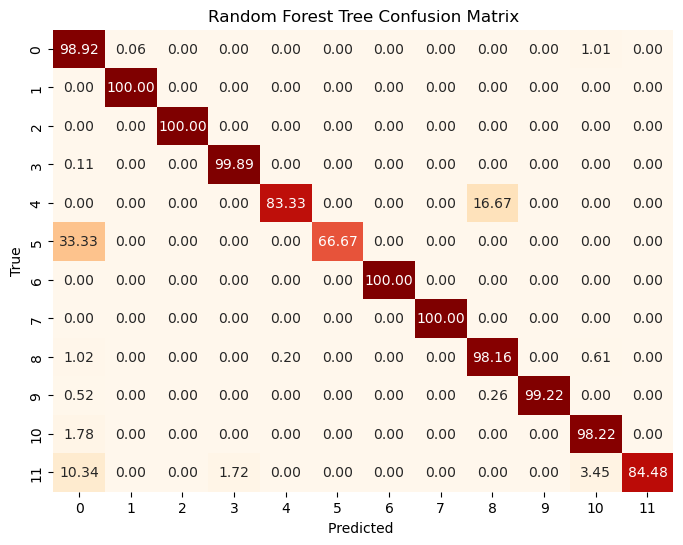

In [10]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_rf))

#confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred_rf)
#making it percent
cm_percent_RFF = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_RFF, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('Random Forest Tree Confusion Matrix')

In [11]:
explained_variance.reset_index

<bound method DataFrame.reset_index of       Explained Variance
PC1             0.171079
PC2             0.111220
PC3             0.089963
PC4             0.084553
PC5             0.071052
PC6             0.044223
PC7             0.034369
PC8             0.033565
PC9             0.028635
PC10            0.023875
PC11            0.021491
PC12            0.019984
PC13            0.019341
PC14            0.017782
PC15            0.016662
PC16            0.013358
PC17            0.012821
PC18            0.012557
PC19            0.011775
PC20            0.011113
PC21            0.010786
PC22            0.010753
PC23            0.010730
PC24            0.010350
PC25            0.009382
PC26            0.009213
PC27            0.008654
PC28            0.008390
PC29            0.007392
PC30            0.007140
PC31            0.006634
PC32            0.006082>

## KNN Model

In [12]:
# Instantiate the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

/Users/emilysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.994761208576998
                            precision    recall  f1-score   support

            ARP_poisioning       0.96      0.97      0.96      1578
            DDOS_Slowloris       0.98      0.96      0.97       100
             DOS_SYN_Hping       1.00      1.00      1.00     18897
              MQTT_Publish       0.99      1.00      1.00       871
Metasploit_Brute_Force_SSH       1.00      0.67      0.80         6
             NMAP_FIN_SCAN       1.00      0.67      0.80         3
         NMAP_OS_DETECTION       1.00      1.00      1.00       393
             NMAP_TCP_scan       1.00      1.00      1.00       220
             NMAP_UDP_SCAN       0.99      0.98      0.98       489
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       384
               Thing_Speak       0.97      0.98      0.97      1625
                Wipro_bulb       1.00      0.76      0.86        58

                  accuracy                           0.99     24624
                 m

## Gaussian mixture model

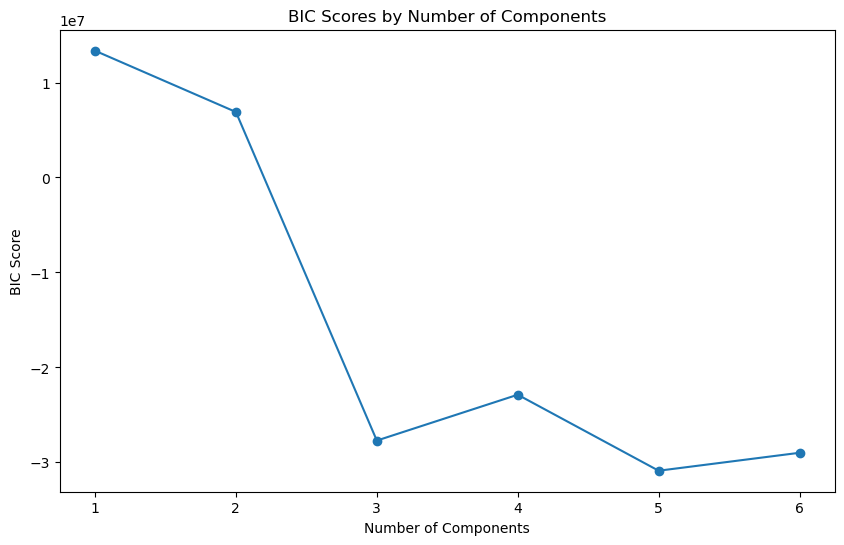

In [13]:
bic = []
n_components_range = range(1, 7)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_pca)
    bic.append(gmm.bic(X_pca))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic, marker='o')
plt.title('BIC Scores by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()

Choose lowest BIC score

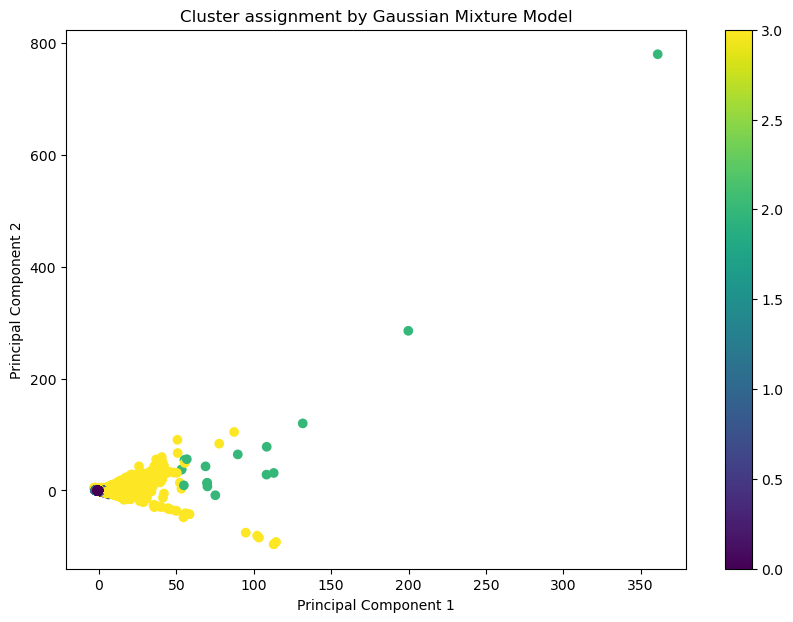

In [14]:
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X_pca)

# Predict the cluster for each data point
labels = gmm.predict(X_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Cluster assignment by Gaussian Mixture Model')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

## SVM Analysis

In [15]:
from sklearn.svm import SVC
from matplotlib.pyplot import savefig

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
## Test different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernels:
    svc = SVC(kernel= k)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Results for Kernel =", k)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

/Users/emilysu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Ouputing the confusion matrix for the most accurate kernel
#confusion matrix 
cm_svm_cv = confusion_matrix(y_test, y_pred)
#making it percent
cm_percent_svm_cv = cm_svm_cv / np.sum(cm_svm_cv, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_svm_cv, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
savefig("SVM_CM.png")

In [ ]:
## test different train-test split 10/90, 20/80, 30/70 

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

for k in kernels:
    svc = SVC(kernel= k)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Results for Kernel =", k)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))